# Tutorial 7: random on the best 400 features

---

### Introduction

Hello, this notebook will show how to use RFE to perform further feature selection, as we found that most features are very highly correlated, therfore we would need to remove those using the tool that we mentioned above. 

first, let us call the data

In [1]:
%store -r df_input_GS
%store -r y_GS
%store -r df_GS

In [2]:
y_GS = y_GS.map({'S': 1, 'B': 0})

---

calling some packages

In [3]:
# Python packages 
import pandas as pd # for importing data into data frame format
import seaborn as sns # For drawing useful graphs, such as bar graphs
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std

---

<b><i> Data splitting </i></b> 

In [4]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_input_GS, y_GS, test_size = 0.3, random_state=3, stratify=y_GS) # train and valid sets

In [5]:
print(Xtrain.shape)
print(Xtest.shape)

(352, 2074)
(151, 2074)


---

<b><i> get the best N features </i></b> 

In [6]:
%store -r featImp_GS

In [7]:
arrimp = np.array(featImp_GS).mean(0)
sorted_idx = arrimp.argsort()
print(sorted_idx[-10:])

[1793 1775 2048   31    3 1771  544 1781   17   45]


In [8]:
cols_ordered = df_input_GS.columns[sorted_idx][-400:]
cols_ordered

Index([1841.364,  980.575, 1133.147, 2337.819,  911.297, 1075.338, 1155.366,
        974.677, 1447.594, 1613.342,
       ...
       1968.596, 1942.053, 2441.281,   842.04,  834.451, 1936.251, 1010.382,
       1950.821,  838.229,  845.886],
      dtype='object', length=400)

---

In [9]:
Xtrain[cols_ordered]

,1841.364,980.575,1133.147,2337.819,911.297,1075.338,1155.366,974.677,1447.594,1613.342,...,1968.596,1942.053,2441.281,842.040,834.451,1936.251,1010.382,1950.821,838.229,845.886
210,-0.347752,-0.782148,-0.788094,-0.165300,-0.825079,-0.805515,-0.716025,-0.784317,-0.259222,-0.440796,...,-0.103180,-0.064431,-0.126623,-0.852611,-0.868323,-0.056824,-0.791167,-0.077484,-0.863861,-0.859112
266,0.597408,0.973945,0.975639,0.444570,1.038538,1.021833,0.902108,0.969298,0.414803,0.681119,...,0.323973,0.292242,0.386553,1.040755,1.046849,0.284218,0.986368,0.303714,1.044837,1.048485
458,0.954467,0.148099,0.146223,1.005679,-0.014365,0.042751,0.305590,0.144290,1.058035,0.908711,...,0.992127,0.954164,0.948222,-0.020894,-0.012900,0.947342,0.135750,0.966534,-0.014697,-0.009475
322,0.843525,1.076064,1.073435,0.764227,1.160048,1.132404,1.006338,1.075378,0.779457,0.892410,...,0.693932,0.669354,0.738082,1.176984,1.173067,0.661299,1.091540,0.674564,1.178287,1.173193
171,-1.332538,-1.178695,-1.178955,-1.317824,-1.103519,-1.118396,-1.244864,-1.178938,-1.322936,-1.319953,...,-1.295124,-1.280268,-1.305844,-1.101613,-1.111279,-1.276586,-1.157541,-1.285318,-1.109319,-1.106318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,-0.471415,-0.655091,-0.660125,-0.330135,-0.755149,-0.722527,-0.582161,-0.651424,-0.520635,-0.539580,...,-0.318073,-0.258179,-0.249466,-0.775807,-0.771421,-0.246058,-0.683964,-0.277660,-0.772976,-0.771858
430,1.887427,1.430805,1.428148,1.911442,1.390439,1.399330,1.493246,1.431303,2.074960,1.798811,...,1.950348,1.916986,1.834398,1.378890,1.385954,1.913913,1.412999,1.927220,1.381970,1.384165
5,-0.639943,-0.965198,-0.951341,-0.497273,-0.938288,-0.954291,-0.937417,-0.962535,-0.507058,-0.808180,...,-0.417211,-0.403042,-0.442860,-0.919328,-0.912298,-0.401600,-0.971304,-0.407482,-0.916736,-0.915225
310,1.131033,1.209887,1.212979,1.132749,1.248526,1.238886,1.187899,1.216206,1.094078,1.152663,...,1.100754,1.096170,1.103933,1.246935,1.246373,1.096653,1.219850,1.098692,1.251592,1.253352


---

### LR

In [10]:
from sklearn.linear_model import LogisticRegression
import random
random_feat = []
for i in range (100):
    res = random.sample(range(0, 400), 6)
    random_feat.append(res)
    # print(res)

In [11]:
lr = LogisticRegression()

In [12]:
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

In [13]:
models = [[lr, 'lr', 14]]
par = [lr_par]

In [14]:
from source.ml_acc import get_accuracy_ml

2


/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/hussein/source/apple_classification/appleVer/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/users/

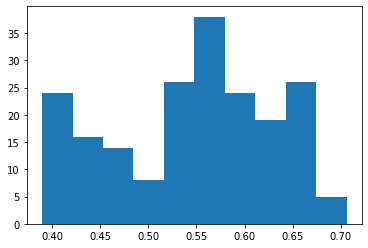

0.546833562675717
0.0816452449121644
3


In [ ]:
num_ml_tools = len(par)
ml_dicts = {}
tot_acc = []
for m, par in zip(models, par):
    key0 = str(m[1])
    ml_dicts[key0] = {}
    i = 0
    for i in range(2,9,1):
        print(i)
        acc = []
        for t in range (200):
            rand = random.sample(range(0, 400), i)

            # print(i)

            xtr =  Xtrain[cols_ordered].iloc[:, rand]
            xte =  Xtest[cols_ordered].iloc[:, rand]
            results = get_accuracy_ml (m[0], m[2], par, np.array(xtr), np.array(Ytrain), np.array(xte), np.array(Ytest)) # to get the accuracies for the ml model

            key = str(m[1])+","+str((i))
            ml_dicts[key0][key] = {}
            acc.append(results[0])

            ml_dicts[key0][key]['tot_acc'] = results[0]
            ml_dicts[key0][key]['jack_train'] = results[1]
            ml_dicts[key0][key]['jack_test'] = results[2]
            
        plt.hist(acc)
        plt.show()
        print(mean(acc))
        print(std(acc))
        tot_acc.append(acc)

---

In [ ]:
for i in range(2,9,1):
    print(i)
    print(mean(tot_acc[i]))
    print(std(tot_acc[i]))
    plt.hist(tot_acc[i])
    plt.show()
    print()